In [1]:
import numpy as np
import pandas as pd
import os
import math
import pickle

import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
## Prep Data

data_all_features = pd.DataFrame()
data_all_labels = pd.DataFrame()

for file in tqdm(os.listdir('/Users/chang/PhD_workplace/MIE1612/project/data/beasley98'+'/train')):
    if not file.startswith('.'):
        file_name = file[:-4]
        feature_path = f'/Users/chang/PhD_workplace/MIE1612/project/data/training/cpfl_cuts_info_{file_name}_features.csv'
        if os.path.exists(feature_path):
            tmp_pd = pd.read_csv(feature_path)
            tmp_label = pd.read_csv(f'/Users/chang/PhD_workplace/MIE1612/project/data/training/cpfl_cuts_info_{file_name}_labels.csv')
            print(file_name, tmp_pd.shape, tmp_label.shape)
            data_all_features = data_all_features.append(tmp_pd)
            data_all_labels = data_all_labels.append(tmp_label)
        else:
            tmp_pd = pd.read_csv(f'/Users/chang/PhD_workplace/MIE1612/project/data/training/cpfl_cuts_info_{file_name}.csv')
            print(file_name, tmp_pd.shape)
            data_all_features = data_all_features.append(tmp_pd.iloc[: , :-2])
            data_all_labels = data_all_labels.append(tmp_pd.iloc[: , -2:])
    print(data_all_features.shape, data_all_labels.shape)
            

  0%|                                                                                                                             | 0/28 [00:00<?, ?it/s]/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_74154/1204990747.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_features = data_all_features.append(tmp_pd)
/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_74154/1204990747.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_labels = data_all_labels.append(tmp_label)
/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_74154/1204990747.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_features = data_all_features.append(tmp_pd)
/var/folders/c_/dv98_90x7fv41pnx2fb

cap132 (3100, 13) (3100, 2)
(3100, 13) (3100, 2)
cap133 (2900, 13) (2900, 2)
(6000, 13) (6000, 2)
cap131 (3300, 13) (3300, 2)
(9300, 13) (9300, 2)
cap124 (1503, 13) (1503, 2)
(10803, 13) (10803, 2)
(10803, 13) (10803, 2)
cap121 (1203, 13) (1203, 2)
(12006, 13) (12006, 2)
cap123 (1504, 13) (1504, 2)
(13510, 13) (13510, 2)
cap64 (2900, 15)
(16410, 13) (16410, 2)
cap72 (5000, 13) (5000, 2)
(21410, 13) (21410, 2)
cap73 (5000, 13) (5000, 2)
(26410, 13) (26410, 2)
cap62 (3500, 13) (3500, 2)
(29910, 13) (29910, 2)
cap74 (5000, 13) (5000, 2)
(34910, 13) (34910, 2)
cap61 (2700, 15)


/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_74154/1204990747.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_features = data_all_features.append(tmp_pd)
/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_74154/1204990747.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_labels = data_all_labels.append(tmp_label)
/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_74154/1204990747.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_features = data_all_features.append(tmp_pd.iloc[: , :-2])
/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_74154/1204990747.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a f

/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_74154/1204990747.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_labels = data_all_labels.append(tmp_label)
/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_74154/1204990747.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_features = data_all_features.append(tmp_pd)
/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_74154/1204990747.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_labels = data_all_labels.append(tmp_label)
/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_74154/1204990747.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

(37610, 13) (37610, 2)
cap93 (1700, 15)
(39310, 13) (39310, 2)
cap44 (475, 15)
(39785, 13) (39785, 2)
cap51 (1300, 15)
(41085, 13) (41085, 2)
cap92 (1800, 15)
(42885, 13) (42885, 2)
cap84 (3001, 15)
(45886, 13) (45886, 2)
cap91 (1100, 15)
(46986, 13) (46986, 2)
cap81 (3105, 15)
(50091, 13) (50091, 2)
cap43 (475, 15)
(50566, 13) (50566, 2)
cap82 (2909, 15)
(53475, 13) (53475, 2)
cap41 (383, 15)
(53858, 13) (53858, 2)
cap113 (5000, 13) (5000, 2)
(58858, 13) (58858, 2)
cap112 (5000, 13) (5000, 2)
(63858, 13) (63858, 2)
cap104 (1200, 13) (1200, 2)
(65058, 13) (65058, 2)
cap101 (800, 13) (800, 2)
(65858, 13) (65858, 2)
cap103 (900, 15)
(66758, 13) (66758, 2)


In [3]:
print(data_all_features.shape)
print(data_all_labels.shape)

(66758, 13)
(66758, 2)


In [4]:
# generate labels
data_all_labels['delta_change'] = data_all_labels['MP_obj_after'] - data_all_labels['MP_obj_before']

In [5]:
data_all_labels['pct_change'] = np.where(data_all_labels['MP_obj_after'] == 0, 0, (data_all_labels['MP_obj_after'] - data_all_labels['MP_obj_before'])/data_all_labels['MP_obj_after'])


In [6]:
data_all_labels['label'] = np.where(data_all_labels['pct_change'] > 0.0003, 1, 0)

In [7]:
data_all_labels[data_all_labels['delta_change'] > 0].sample(5)

,MP_obj_before,MP_obj_after,delta_change,pct_change,label
270,1.404135e+08,1.405021e+08,88569.456142,0.000630,1
1355,6.234488e+07,6.247724e+07,132358.868093,0.002119,1
258,1.175699e+07,1.196294e+07,205955.401868,0.017216,1
1082,6.767706e+07,6.769982e+07,22756.124427,0.000336,1
1064,6.974242e+07,6.976524e+07,22821.135015,0.000327,1


In [8]:
data_all_labels[data_all_labels['label'] == 1]['label'].sum()

6685

In [9]:
data_all_labels.shape

(66758, 5)

<AxesSubplot:ylabel='Frequency'>

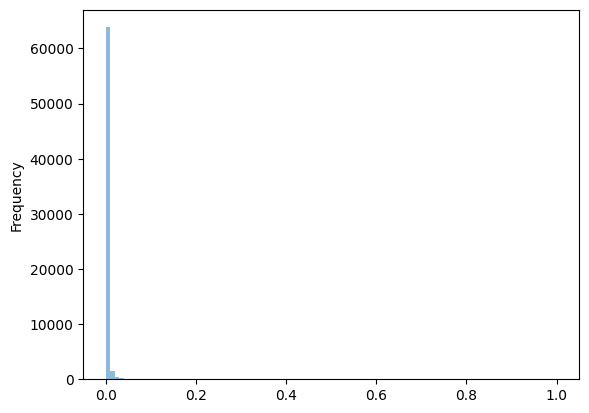

In [10]:
data_all_labels['pct_change'].plot.hist(bins=100, alpha=0.5)

In [39]:
data_all_labels[data_all_labels['pct_change'] == 0]

,MP_obj_before,MP_obj_after,delta_change,pct_change,label
0,0.000000e+00,0.000000e+00,0.0,0.0,0
2,1.250000e+04,1.250000e+04,0.0,0.0,0
3,1.250000e+04,1.250000e+04,0.0,0.0,0
4,1.250000e+04,1.250000e+04,0.0,0.0,0
5,1.250000e+04,1.250000e+04,0.0,0.0,0
...,...,...,...,...,...
895,7.940981e+07,7.940981e+07,0.0,0.0,0
896,7.940981e+07,7.940981e+07,0.0,0.0,0
897,7.940981e+07,7.940981e+07,0.0,0.0,0
898,7.940981e+07,7.940981e+07,0.0,0.0,0


In [42]:
len(data_all_labels[data_all_labels['pct_change'] <= 0.1])

66465

In [64]:
59185/66758

0.8865604122352377

In [58]:
np.arange(0, 1+0.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [63]:
pd.cut(data_all_labels['pct_change'],bins)
new_df = data_all_labels.groupby(pd.cut(data_all_labels["pct_change"], np.arange(0, 1+0.1, 0.1))).count()
new_df['pct'] = new_df['delta_change']/66758
new_df.transpose()

pct_change,"(0.0, 0.1]","(0.1, 0.2]","(0.2, 0.3]","(0.3, 0.4]","(0.4, 0.5]","(0.5, 0.6]","(0.6, 0.7]","(0.7, 0.8]","(0.8, 0.9]","(0.9, 1.0]"
MP_obj_before,7127.000000,146.000000,43.000000,25.000000,28.000000,2.00000,0.0,8.00000,8.00000,33.000000
MP_obj_after,7127.000000,146.000000,43.000000,25.000000,28.000000,2.00000,0.0,8.00000,8.00000,33.000000
delta_change,7127.000000,146.000000,43.000000,25.000000,28.000000,2.00000,0.0,8.00000,8.00000,33.000000
pct_change,7127.000000,146.000000,43.000000,25.000000,28.000000,2.00000,0.0,8.00000,8.00000,33.000000
label,7127.000000,146.000000,43.000000,25.000000,28.000000,2.00000,0.0,8.00000,8.00000,33.000000
pct,0.106759,0.002187,0.000644,0.000374,0.000419,0.00003,0.0,0.00012,0.00012,0.000494


In [11]:
np.percentile(data_all_labels['pct_change'], 90)

0.000306671607203064

In [12]:
data_all_features.sample(5)

,scenario_num,iteration,instance,numCustomer,numLocation,tot_num_scenario,past_num_cut,previous_cut_all_bool,previous_cut_bool,sub_obj_gap,pct_non_zero_in_gamma,master_nsol,sub_optimal_q_value
1562,62.0,15.0,cap82,50.0,25.0,100.0,16.0,1.0,1.0,0.012679,0.5600,1.637704e+08,1.658735e+08
518,18.0,5.0,cap131,50.0,50.0,100.0,6.0,1.0,1.0,1.000000,0.9200,0.000000e+00,7.618786e+07
3031,31.0,30.0,cap74,50.0,16.0,100.0,31.0,1.0,1.0,1.000000,0.1875,0.000000e+00,3.991615e+08
1902,2.0,19.0,cap82,50.0,25.0,100.0,20.0,1.0,1.0,0.014056,0.5200,1.723568e+08,1.748140e+08
3439,39.0,34.0,cap73,50.0,16.0,100.0,35.0,1.0,1.0,1.000000,0.1875,0.000000e+00,3.660697e+08


In [13]:
feature_cols = ['iteration', 'numCustomer', 'numLocation', 'tot_num_scenario', 'past_num_cut',
               'previous_cut_all_bool', 'previous_cut_bool', 'sub_obj_gap', 'pct_non_zero_in_gamma']

## Models


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scikitplot as skplt

In [15]:
## split train and test
X_train, X_test, y_train, y_test = train_test_split(data_all_features[feature_cols], data_all_labels['label'], test_size=0.33, random_state=42)


In [16]:
%%time
log_reg_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

CPU times: user 731 ms, sys: 13.2 ms, total: 745 ms
Wall time: 206 ms


In [17]:
y_pred_proba_log_reg = log_reg_clf.predict_proba(X_test)
y_train_proba_log_reg = log_reg_clf.predict_proba(X_train)
threshold = 0.3
y_pred_log_reg = (y_pred_proba_log_reg[:,1] >= threshold).astype(bool)
y_train_log_reg = (y_train_proba_log_reg[:,1] >= threshold).astype(bool)

In [18]:
metrics.roc_auc_score(y_test, y_pred_proba_log_reg[:, 1])

0.9333693946120284

/Users/chang/anaconda/envs/python3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

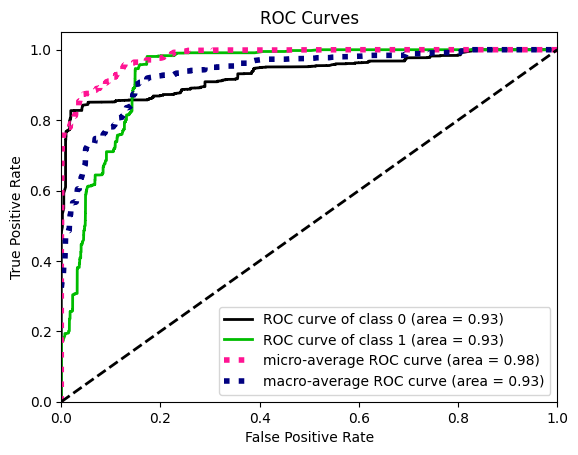

In [19]:
skplt.metrics.plot_roc_curve(y_test, y_pred_proba_log_reg)

In [20]:
metrics.roc_auc_score(y_train, log_reg_clf.predict_proba(X_train)[:, 1])

0.9314945610688048

In [21]:
print(metrics.classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     19839
           1       0.51      0.64      0.57      2192

    accuracy                           0.90     22031
   macro avg       0.73      0.79      0.76     22031
weighted avg       0.91      0.90      0.91     22031



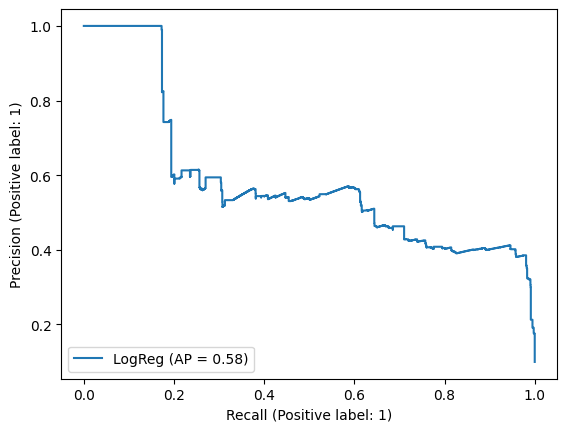

In [22]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_log_reg[:,1], name="LogReg")

In [23]:
metrics.accuracy_score(y_test, y_pred_log_reg)

0.9030910989060869

In [24]:
metrics.accuracy_score(y_train, y_train_log_reg)

0.899054262525991

In [25]:
from sklearn import svm

In [26]:
%%time

svm_clf = svm.SVC(class_weight = 'balanced', verbose = True, random_state = 0, probability=True)
svm_clf.fit(X_train, y_train)

[LibSVM]..................
*.
*.
*.
*.
*
optimization finished, #iter = 20464
obj = -17476.377209, rho = 10.030845
nSV = 18573, nBSV = 17788
Total nSV = 18573
...................
*.
*.
*.
*.
*
optimization finished, #iter = 21636
obj = -17579.413783, rho = 9.786108
nSV = 18678, nBSV = 17875
Total nSV = 18678
..................
*.
*.
*.
*
optimization finished, #iter = 20617
obj = -17463.966978, rho = 9.298044
nSV = 18531, nBSV = 17671
Total nSV = 18531
...................
*.
*.
*.
*
optimization finished, #iter = 21096
obj = -17455.262920, rho = 9.920651
nSV = 18560, nBSV = 17662
Total nSV = 18560
..................
*.
*..
*.
*
optimization finished, #iter = 21059
obj = -17505.081971, rho = 9.928338
nSV = 18605, nBSV = 17692
Total nSV = 18605
.........................
*.
*.
*
optimization finished, #iter = 25814
obj = -21561.029434, rho = -10.413040
nSV = 23017, nBSV = 20606
Total nSV = 23017
CPU times: user 5min 51s, sys: 1.66 s, total: 5min 52s
Wall time: 5min 53s


SVC(class_weight='balanced', probability=True, random_state=0, verbose=True)

In [27]:
y_pred_proba_svm = svm_clf.predict_proba(X_test)
y_train_proba_svm = svm_clf.predict_proba(X_train)

In [28]:
metrics.roc_auc_score(y_test, y_pred_proba_svm[:, 1])

0.8921581734789876

/Users/chang/anaconda/envs/python3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

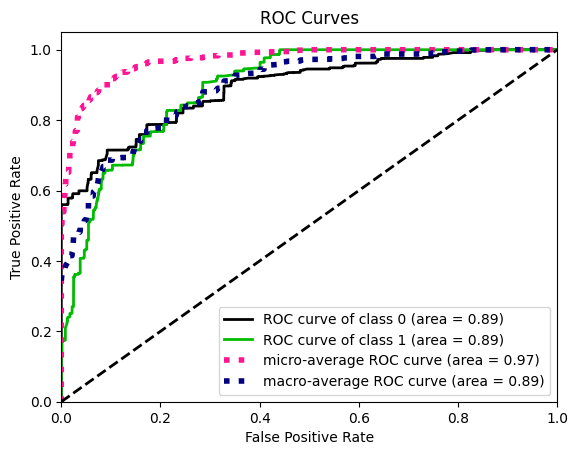

In [29]:
skplt.metrics.plot_roc_curve(y_test, y_pred_proba_svm)

In [30]:
threshold = 0.3
y_pred_svm = (y_pred_proba_svm[:,1] >= threshold).astype(bool)
y_train_svm = (y_train_proba_svm[:,1] >= threshold).astype(bool)


In [31]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     19839
           1       0.46      0.60      0.52      2192

    accuracy                           0.89     22031
   macro avg       0.71      0.76      0.73     22031
weighted avg       0.91      0.89      0.90     22031



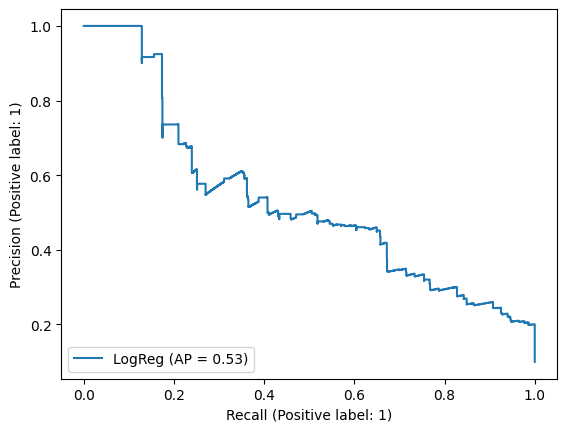

In [32]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_svm[:, 1], name="LogReg")

In [33]:
print('train accuracy: ', metrics.accuracy_score(y_train, y_train_svm))
print('test accuracy: ', metrics.accuracy_score(y_test, y_pred_svm))

train accuracy:  0.8871375231962797
test accuracy:  0.8908356406881213


In [34]:
import xgboost as xgb
from xgboost import XGBClassifier

In [35]:
%%time
xgb = XGBClassifier(scale_pos_weight = ((len(y_train) - y_train.sum()) / y_train.sum()))
xgb.fit(X_train, y_train)

CPU times: user 7.83 s, sys: 104 ms, total: 7.94 s
Wall time: 1.08 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [58]:
y_pred_proba_xgb = xgb.predict_proba(X_test)
y_train_proba_xgb = xgb.predict_proba(X_train)

In [33]:
y_pred_proba_xgb[:,1]

array([2.8361163e-07, 3.6613380e-06, 3.0459225e-07, ..., 5.3229724e-05,
       9.9950206e-01, 1.3463825e-01], dtype=float32)

In [34]:
metrics.roc_auc_score(y_test, y_pred_proba_xgb[:, 1])

0.9973592161425019

/Users/chang/anaconda/envs/python3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

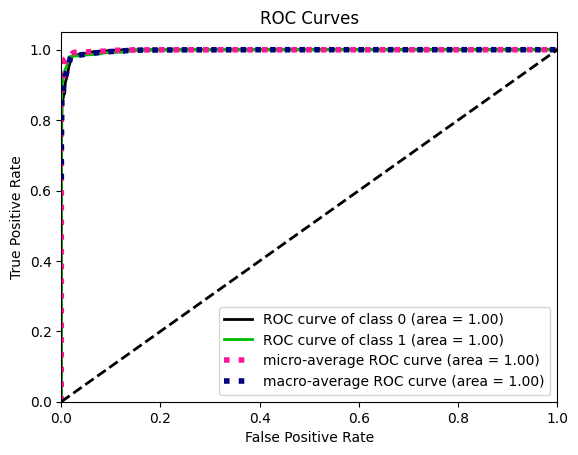

In [35]:
skplt.metrics.plot_roc_curve(y_test, y_pred_proba_xgb)

In [59]:
threshold = 0.3
y_pred_xgb = (y_pred_proba_xgb[:,1] >= threshold).astype(bool)
y_train_xgb = (y_train_proba_xgb[:,1] >= threshold).astype(bool)

In [61]:
print('train accuracy: ', metrics.accuracy_score(y_train, y_train_xgb))
print('test accuracy: ', metrics.accuracy_score(y_test, y_pred_xgb))

train accuracy:  0.9816441970174615
test accuracy:  0.9802550950932777


In [37]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19839
           1       0.85      0.98      0.91      2192

    accuracy                           0.98     22031
   macro avg       0.92      0.98      0.95     22031
weighted avg       0.98      0.98      0.98     22031



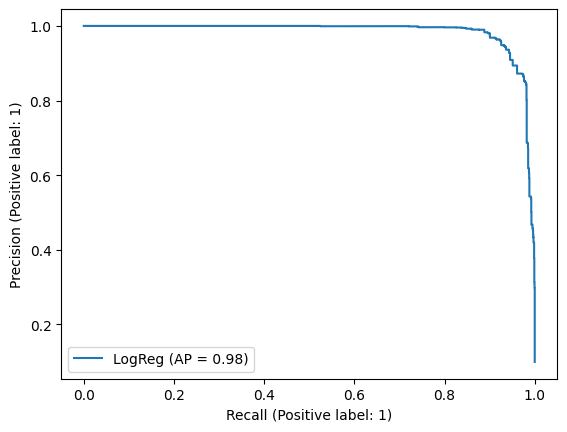

In [38]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_xgb[:, 1], name="LogReg")

In [40]:
xgb.save_model("xgb_model_v2.json")

In [42]:
pickle.dump(log_reg_clf, open('log_reg_model_v2.pkl', 'wb'))
pickle.dump(svm_clf, open('svm_model_v2.pkl', 'wb'))
pickle.dump(xgb, open('xgb_model_v2.pkl', 'wb'))


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

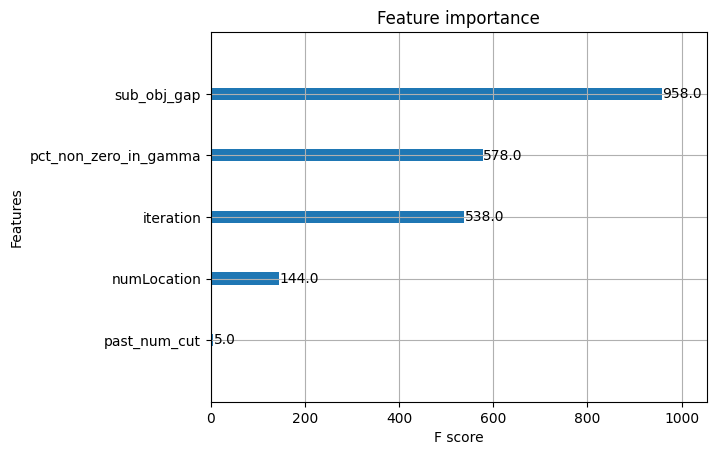

In [43]:
# plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
# plt.show()

from xgboost import plot_importance
plot_importance(xgb)

In [45]:
X_train.columns

Index(['iteration', 'numCustomer', 'numLocation', 'tot_num_scenario',
       'past_num_cut', 'previous_cut_all_bool', 'previous_cut_bool',
       'sub_obj_gap', 'pct_non_zero_in_gamma'],
      dtype='object')

In [46]:
xgb.feature_importances_

array([0.5190242 , 0.        , 0.15168205, 0.        , 0.0102689 ,
       0.        , 0.        , 0.07271431, 0.24631053], dtype=float32)

In [47]:
data_all_features.groupby('instance').count().sort_values('scenario_num');

In [48]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

/Users/chang/anaconda/envs/python3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


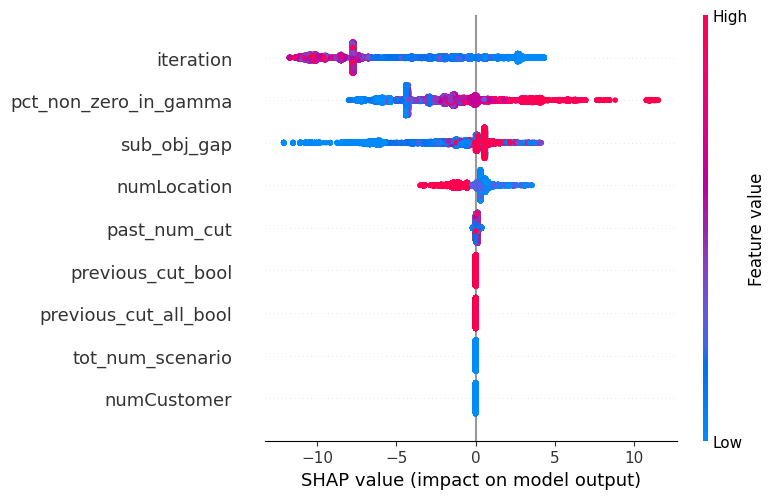

In [49]:
shap.summary_plot(shap_values, X_test)

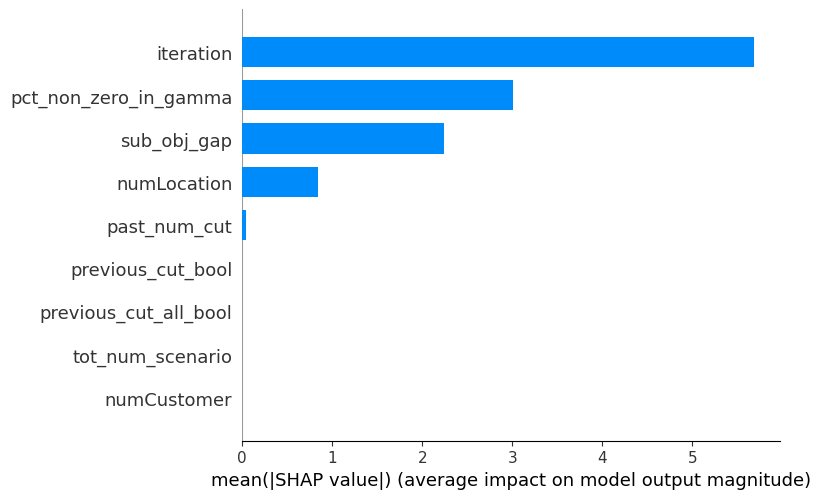

In [50]:
shap.summary_plot(shap_values, X_test, plot_type="bar")